# Assignment-2

# **Convolution **

**Downloading the data**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashidharreddy1","key":"4c3d2ad07b5aa8e879f619f2b1bda7fb"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats
     

100% 809M/812M [00:21<00:00, 40.2MB/s]
100% 812M/812M [00:21<00:00, 39.0MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# **Training the convent network from scratch**

**Model 1:Training sample of 1000, a validation sample of 500, and a test sample of 500**

In [ ]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 17s 77ms/step - loss: 0.6951 - accuracy: 0.5090 - val_loss: 0.6873 - val_accuracy: 0.5620
Epoch 2/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6869 - accuracy: 0.5810 - val_loss: 0.6626 - val_accuracy: 0.5920
Epoch 3/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6587 - accuracy: 0.6265 - val_loss: 0.6914 - val_accuracy: 0.5870
Epoch 4/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6214 - accuracy: 0.6590 - val_loss: 0.6278 - val_accuracy: 0.6660
Epoch 5/30
63/63 [==============================] - 5s 76ms/step - loss: 0.5858 - accuracy: 0.6935 - val_loss: 0.6120 - val_accuracy: 0.6620
Epoch 6/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5570 - accuracy: 0.7155 - val_loss: 0.5838 - val_accuracy: 0.6890
Epoch 7/30
63/63 [==============================] - 5s 77ms/step - loss: 0.5427 - accuracy: 0.7205 - val_loss: 0.6208 - val_accuracy: 0.6450
Epoch 8/30
6

**Displaying curves of loss and accuracy during training**

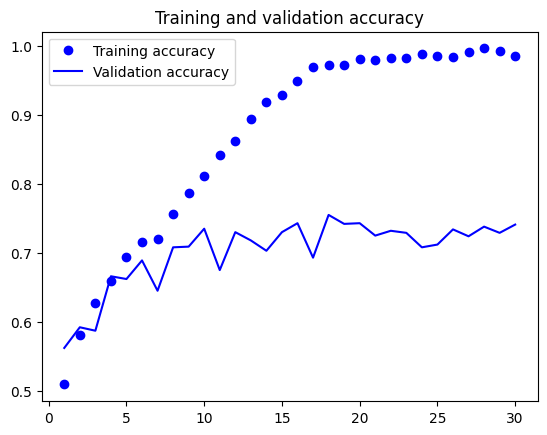

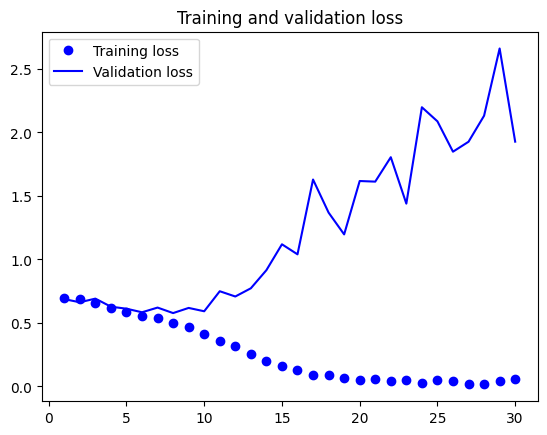

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 41ms/step - loss: 0.5587 - accuracy: 0.7300
Test accuracy: 0.730


Since the validation and the tes accuracy of the model is very low that is 73%

To improve performance in developing a network that we trained from scratch, we will train our model on following techniques.

**Model 1a: Using Data Augmentation**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 64ms/step - loss: 0.7099 - accuracy: 0.4990 - val_loss: 0.6929 - val_accuracy: 0.5240
Epoch 2/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6960 - accuracy: 0.5200 - val_loss: 0.6898 - val_accuracy: 0.5770
Epoch 3/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6949 - accuracy: 0.5515 - val_loss: 0.6873 - val_accuracy: 0.5490
Epoch 4/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6810 - accuracy: 0.5740 - val_loss: 0.6589 - val_accuracy: 0.6160
Epoch 5/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6670 - accuracy: 0.6125 - val_loss: 0.6810 - val_accuracy: 0.5600
Epoch 6/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6526 - accuracy: 0.6315 - val_loss: 0.6287 - val_accuracy: 0.6620
Epoch 7/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6376 - accuracy: 0.6375 - val_loss: 0.7022 - val_accuracy: 0.5730
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4276 - accuracy: 0.8100
Test accuracy: 0.810


**Defining a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

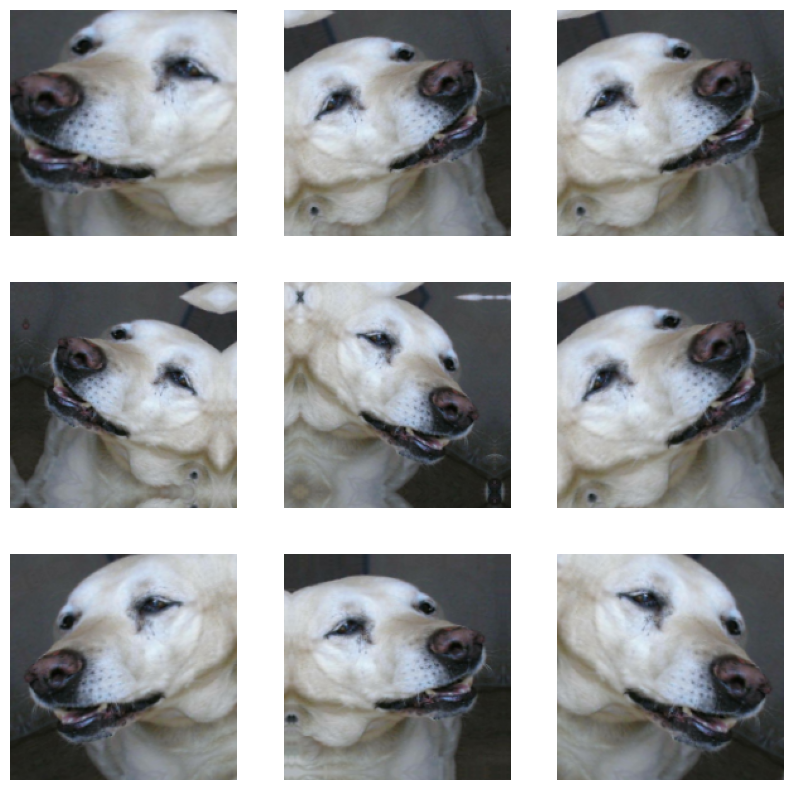

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 1b: Using Dropout Method**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 76ms/step - loss: 0.7436 - accuracy: 0.5075 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6958 - accuracy: 0.4995 - val_loss: 0.6928 - val_accuracy: 0.5160
Epoch 3/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6969 - accuracy: 0.5535 - val_loss: 1.2567 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6837 - accuracy: 0.5945 - val_loss: 0.6809 - val_accuracy: 0.5450
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6602 - accuracy: 0.6210 - val_loss: 0.6363 - val_accuracy: 0.6370
Epoch 6/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6154 - accuracy: 0.6590 - val_loss: 0.7799 - val_accuracy: 0.5620
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6061 - accuracy: 0.6755 - val_loss: 0.6143 - val_accuracy: 0.6670
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5086 - accuracy: 0.7450
Test accuracy: 0.745


**Model 1c: Using both Image Augmentation and Dropout mthod**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 77ms/step - loss: 0.7002 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4990
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6958 - accuracy: 0.5195 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6843 - accuracy: 0.5540 - val_loss: 0.7503 - val_accuracy: 0.5040
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6821 - accuracy: 0.5805 - val_loss: 0.6678 - val_accuracy: 0.6060
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6633 - accuracy: 0.6050 - val_loss: 0.6405 - val_accuracy: 0.6180
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6514 - accuracy: 0.6265 - val_loss: 0.6165 - val_accuracy: 0.6670
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6385 - accuracy: 0.6380 - val_loss: 0.6283 - val_accuracy: 0.6510
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.3798 - accuracy: 0.8360
Test accuracy: 0.836


after training the model using the above three techniques we can see that the model trained using both data augmentation and drop out method gave relatively improved accuracy, hence we will be using this technique .

As we know Training with more data helps to increase accoracy of mode as it avoids the overfitting problem. We will be increasing the training sample size further.

**Model 2) Increasing the Training sample size to 5000.Including Maxpooling,Data Augmentation and Dropout technique with dropout rate of 0.5**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more. 
early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


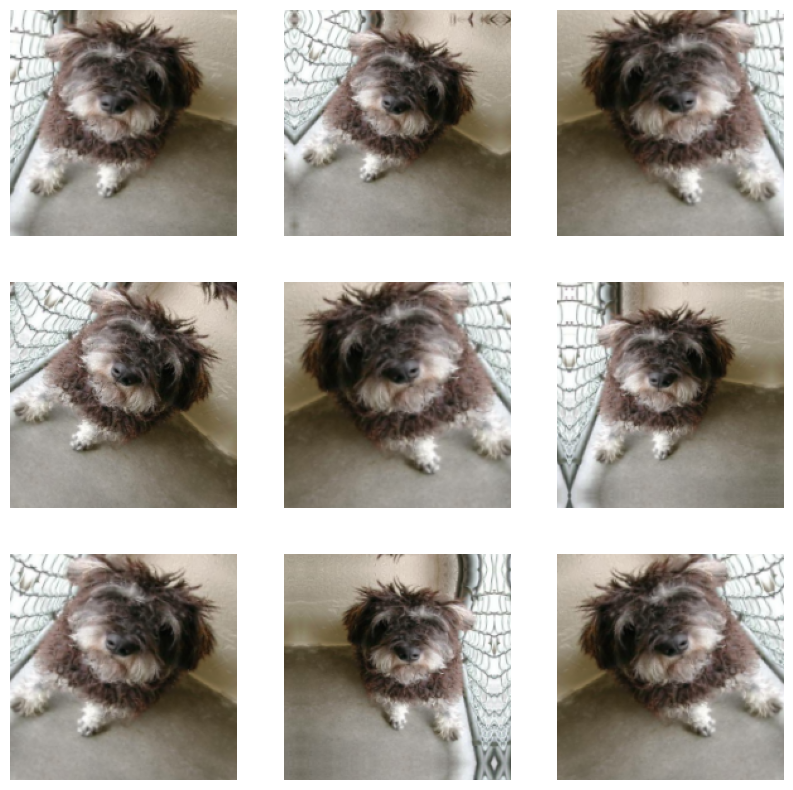

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 18s 51ms/step - loss: 0.6833 - accuracy: 0.5704 - val_loss: 0.6331 - val_accuracy: 0.6370
Epoch 2/30
313/313 [==============================] - 17s 53ms/step - loss: 0.5947 - accuracy: 0.6842 - val_loss: 0.5496 - val_accuracy: 0.7210
Epoch 3/30
313/313 [==============================] - 16s 50ms/step - loss: 0.5111 - accuracy: 0.7530 - val_loss: 0.5938 - val_accuracy: 0.7230
Epoch 4/30
313/313 [==============================] - 16s 51ms/step - loss: 0.4465 - accuracy: 0.7987 - val_loss: 0.4511 - val_accuracy: 0.7740
Epoch 5/30
313/313 [==============================] - 16s 51ms/step - loss: 0.3849 - accuracy: 0.8275 - val_loss: 0.3156 - val_accuracy: 0.8630
Epoch 6/30
313/313 [==============================] - 16s 51ms/step - loss: 0.3351 - accuracy: 0.8531 - val_loss: 0.2382 - val_accuracy: 0.9070
Epoch 7/30
313/313 [==============================] - 17s 53ms/step - loss: 0.2866 - accuracy: 0.8769 - val_loss: 0.2182 - val_accuracy:

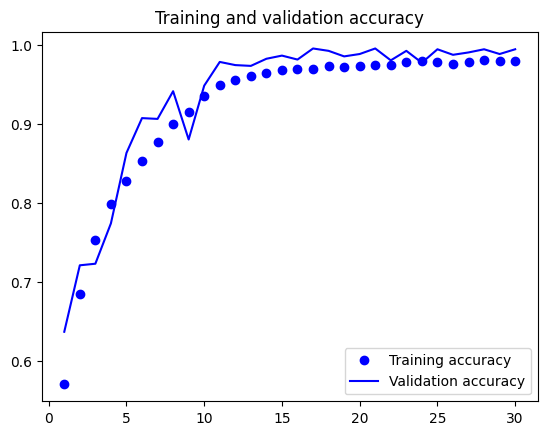

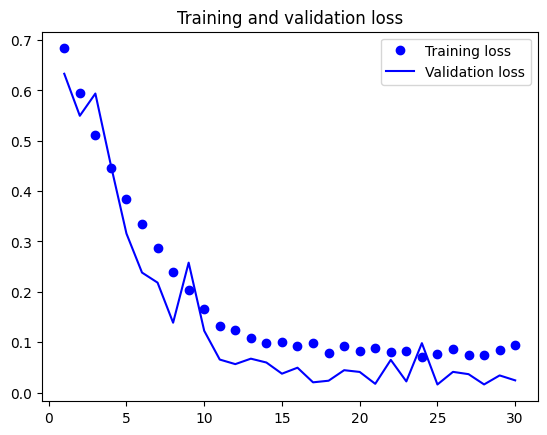

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.9154 - accuracy: 0.8780
Test accuracy: 0.878


**Model 3: Increasing the Training sample size to 10000**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


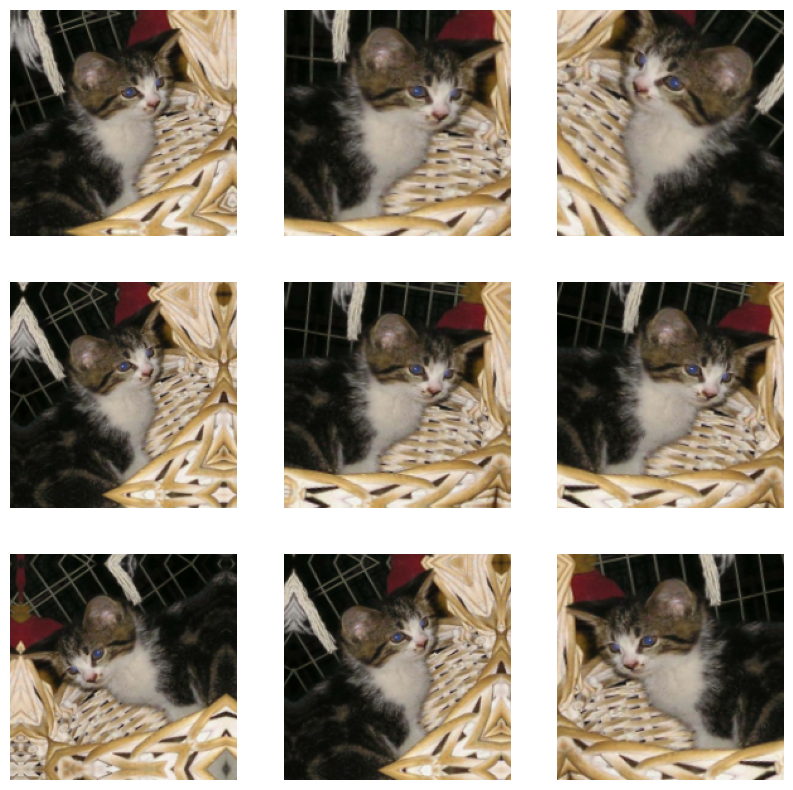

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 35s 52ms/step - loss: 0.6475 - accuracy: 0.6163 - val_loss: 0.5654 - val_accuracy: 0.7100
Epoch 2/30
625/625 [==============================] - 31s 49ms/step - loss: 0.4971 - accuracy: 0.7618 - val_loss: 0.4493 - val_accuracy: 0.7850
Epoch 3/30
625/625 [==============================] - 33s 53ms/step - loss: 0.3995 - accuracy: 0.8216 - val_loss: 0.3768 - val_accuracy: 0.8400
Epoch 4/30
625/625 [==============================] - 31s 50ms/step - loss: 0.3293 - accuracy: 0.8607 - val_loss: 0.3052 - val_accuracy: 0.8650
Epoch 5/30
625/625 [==============================] - 31s 50ms/step - loss: 0.2715 - accuracy: 0.8892 - val_loss: 0.2808 - val_accuracy: 0.8740
Epoch 6/30
625/625 [==============================] - 32s 50ms/step - loss: 0.2191 - accuracy: 0.9110 - val_loss: 0.3851 - val_accuracy: 0.8640
Epoch 7/30
625/625 [==============================] - 31s 50ms/step - loss: 0.1852 - accuracy: 0.9249 - val_loss: 0.2907 - val_accuracy:

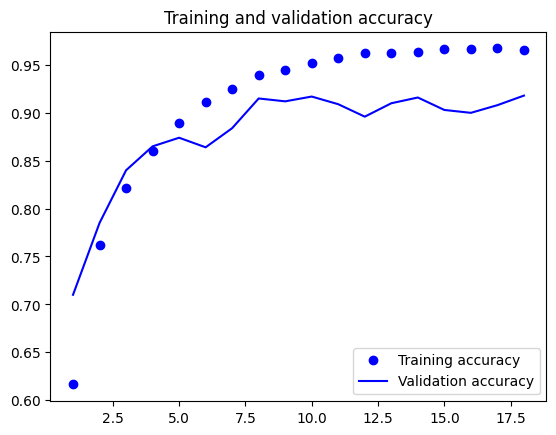

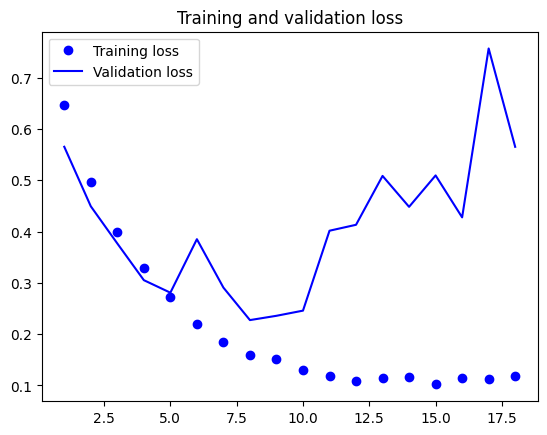

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.3076 - accuracy: 0.8840
Test accuracy: 0.884


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

**Pre-Trained Model - 1000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 218ms/step - loss: 3.4737 - accuracy: 0.7540 - val_loss: 0.7196 - val_accuracy: 0.9240
Epoch 2/30
63/63 [==============================] - 11s 168ms/step - loss: 1.0011 - accuracy: 0.8825 - val_loss: 0.4416 - val_accuracy: 0.9430
Epoch 3/30
63/63 [==============================] - 12s 196ms/step - loss: 0.5510 - accuracy: 0.9085 - val_loss: 0.4215 - val_accuracy: 0.9480
Epoch 4/30
63/63 [==============================] - 11s 163ms/step - loss: 0.4306 - accuracy: 0.9285 - val_loss: 0.3481 - val_accuracy: 0.9590
Epoch 5/30
63/63 [==============================] - 11s 167ms/step - loss: 0.3162 - accuracy: 0.9365 - val_loss: 0.2871 - val_accuracy: 0.9660
Epoch 6/30
63/63 [==============================] - 11s 167ms/step - loss: 0.2211 - accuracy: 0.9475 - val_loss: 0.2601 - val_accuracy: 0.9680
Epoch 7/30
63/63 [==============================] - 11s 168ms/step - loss: 0.1603 - accuracy: 0.9545 - val_loss: 0.2212 - val_accuracy: 0.9670

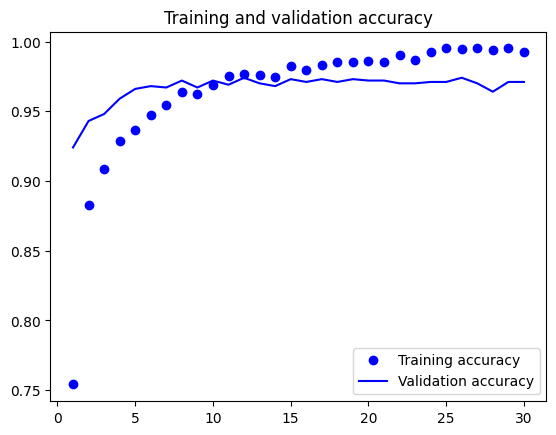

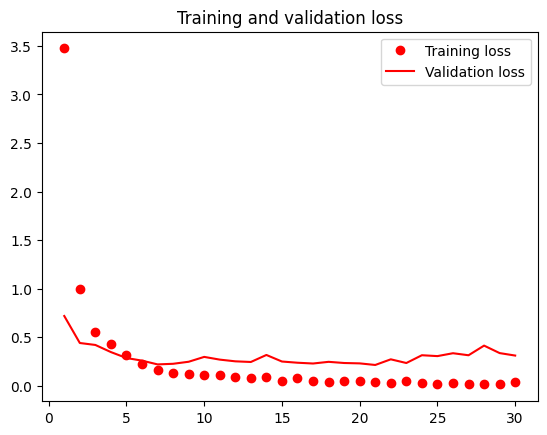

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 89ms/step - loss: 0.2070 - accuracy: 0.9790
Test accuracy: 0.979


**Pre-Trained Model - 5000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 42s 124ms/step - loss: 1.4183 - accuracy: 0.8638 - val_loss: 0.1513 - val_accuracy: 0.9670
Epoch 2/10
313/313 [==============================] - 38s 122ms/step - loss: 0.2354 - accuracy: 0.9306 - val_loss: 0.0946 - val_accuracy: 0.9790
Epoch 3/10
313/313 [==============================] - 38s 122ms/step - loss: 0.1514 - accuracy: 0.9491 - val_loss: 0.0990 - val_accuracy: 0.9770
Epoch 4/10
313/313 [==============================] - 38s 122ms/step - loss: 0.1212 - accuracy: 0.9589 - val_loss: 0.0925 - val_accuracy: 0.9800
Epoch 5/10
313/313 [==============================] - 38s 121ms/step - loss: 0.0998 - accuracy: 0.9654 - val_loss: 0.0780 - val_accuracy: 0.9790
Epoch 6/10
313/313 [==============================] - 38s 121ms/step - loss: 0.1023 - accuracy: 0.9672 - val_loss: 0.0970 - val_accuracy: 0.9770
Epoch 7/10
313/313 [==============================] - 38s 121ms/step - loss: 0.0956 - accuracy: 0.9691 - val_loss: 0.1103 - val_ac

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 90ms/step - loss: 0.1248 - accuracy: 0.9760
Test accuracy: 0.976


**Pre-Trained Model - 10000 samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 76s 118ms/step - loss: 0.6717 - accuracy: 0.8972 - val_loss: 0.1660 - val_accuracy: 0.9630
Epoch 2/10
625/625 [==============================] - 75s 120ms/step - loss: 0.1384 - accuracy: 0.9534 - val_loss: 0.1343 - val_accuracy: 0.9720
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.1018 - accuracy: 0.9658 - val_loss: 0.1099 - val_accuracy: 0.9700
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0896 - accuracy: 0.9687 - val_loss: 0.1128 - val_accuracy: 0.9760
Epoch 5/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0866 - accuracy: 0.9715 - val_loss: 0.1698 - val_accuracy: 0.9780
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0758 - accuracy: 0.9744 - val_loss: 0.2004 - val_accuracy: 0.9780
Epoch 7/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0766 - accuracy: 0.9753 - val_loss: 0.1762 - val_ac

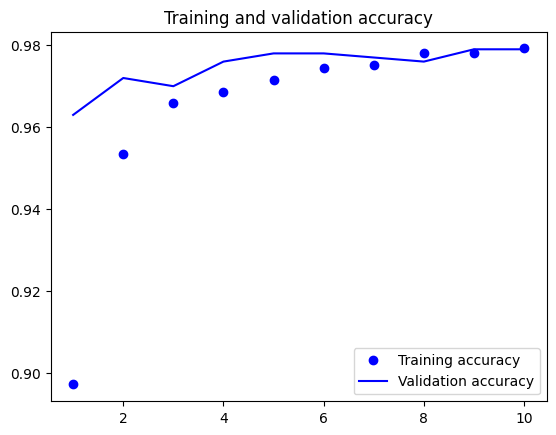

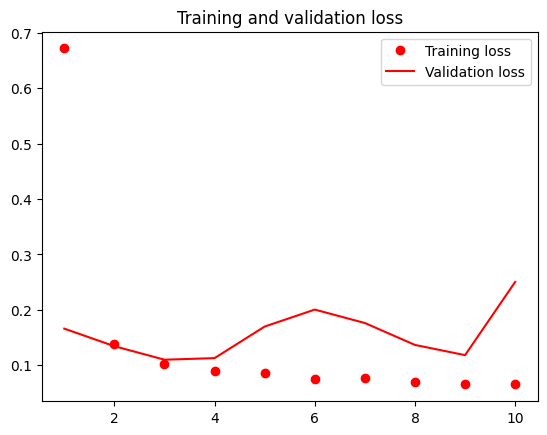

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 0.0440 - accuracy: 0.9860
Test accuracy: 0.986


**Summary**

1.The Model 1 that is the unregularized Model of Cats and Dogs example with training sample of 1000, validation sample of 500 and test sample of 500 gives very low accuracy that is 73%. This represents Overfitting as the training size is small.

2.By using different techniques, we can optimize the performance of the model kepp the sample size the same that is 1000.
For this I have used three techniques on the model those are
a) Drop out Method

b) Data Augmentation

c) Data Augmentation and drop out method.

3.It was observed that the model trained using data augmentation and dropout method gave improved accuracy.





4.Train with more data: As training with more data helps to increase the accuracy. We tried to increase the training samples to 5000 and 10000 gave improved accuracy.

5.Here when the models are pretrained the accuracy was improved upto almost 99%.